### Import necessary libraries

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib
from sklearn.model_selection import cross_val_predict

### Load MNIST data from OpenML
Fetched the classic MNIST digit dataset using `fetch_openml`.


In [5]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

c:\Users\Probook\OneDrive\Desktop\Arch\mnist_env\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
X, y = mnist["data"], mnist["target"]
X.shape


(70000, 784)

### Preview digits
Plot the first six digits to get a sense of the dataset.


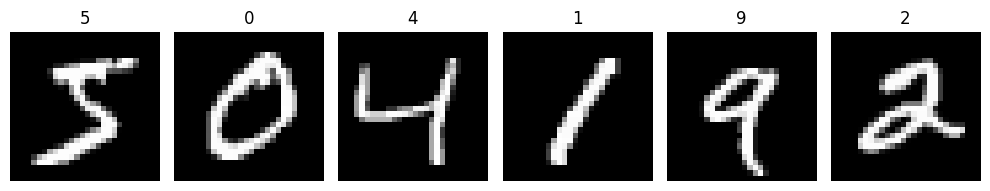

In [7]:
plt.figure(figsize=(10, 2))

for i in range(0, 6):
    image = X[i].reshape(28, 28)
    label = y[i]

    plt.subplot(1, 6, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"{label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


### Splitting into 60k training and 10k test images


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

### Training SGD Classifier.


In [9]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

### Training Random Forest Classifier


In [10]:
Rand_forest = RandomForestClassifier(random_state=42)
Rand_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluating performance


In [11]:
y_pred = Rand_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 968    0    5    1    1    0    3    1    4    0]
 [   0 1136    5    6    1    0    0    1    2    1]
 [   4    2  941    1    4    0    4    4    7    0]
 [   1    0   19  980    0    6    1   12    8    7]
 [   2    0    1    0  880    0    3    3    1   16]
 [   1    1    1   15    3  901    6    0    7    2]
 [   1    1    0    0    2    8  947    0    1    1]
 [   2    3   17    0    5    0    0 1019    1    8]
 [   1    4    7   11    3    6    2    5  923    7]
 [   4    5    2   12   17    1    1    6    9  979]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.94      0.97      0.96       967
           3       0.96      0.95      0.95      1034
           4       0.96      0.97      0.97       906
           5       0.98      0.96      0.97       937
           6       0.98      0.99      0.98       961
           7       0.97      0.97   

In [12]:
y_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 933    0    4    1    1   19   10    2   12    1]
 [   0 1124    1    5    1    9    1    0   10    1]
 [  14   16  694   82   15   36   21    9   78    2]
 [   2    5    5  822    3  138    4    4   36   15]
 [   3    4    3    1  841    9    7    3   14   21]
 [   5    5    2   15   11  862    5    2   28    2]
 [   2    4    4    2    5   54  867    0   23    0]
 [   5    5    7    7   19   15    0  943   20   34]
 [   8   19    0   17    4  135    3    5  771    7]
 [   9    6    1    7   71   35    0   37   36  834]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       983
           1       0.95      0.98      0.96      1152
           2       0.96      0.72      0.82       967
           3       0.86      0.79      0.82      1034
           4       0.87      0.93      0.90       906
           5       0.66      0.92      0.77       937
           6       0.94      0.90      0.92       961
           7       0.94      0.89   

### Function to visualize common misclassifications


In [13]:
def plot_misclassifications(model, X_test, y_test, error_patterns, title=""):
    y_pred = model.predict(X_test)

    # Ensure both are integer arrays
    y_test = y_test.astype(int)
    y_pred = y_pred.astype(int)

    print(f"\nMisclassifications for: {title}")

    for true_label, pred_label in error_patterns:
        mask = (y_test == true_label) & (y_pred == pred_label)
        indices = np.where(mask)[0]

        if len(indices) == 0:
            print(f"No examples found for {true_label} → {pred_label}")
            continue

        # Plot first 5 examples
        plt.figure(figsize=(10, 2))
        for i, index in enumerate(indices[:5]):
            image = X_test[index].reshape(28, 28)
            plt.subplot(1, 5, i + 1)
            plt.imshow(image, cmap="gray")
            plt.title(f"{true_label} → {pred_label}")
            plt.axis("off")

        plt.suptitle(f"{title}: {true_label} → {pred_label}", fontsize=14)
        plt.tight_layout()
        plt.show()


### Visualizing top 3 common errors



Misclassifications for: Random Forest


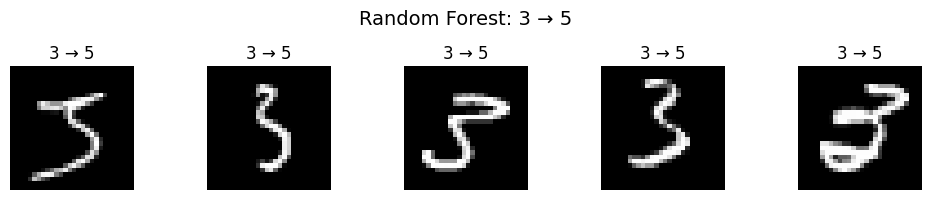

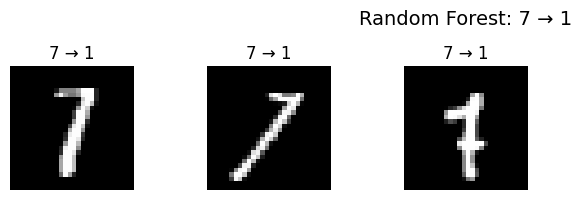

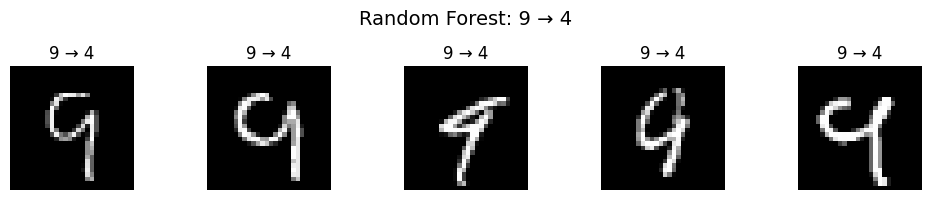


Misclassifications for: SGD Classifier


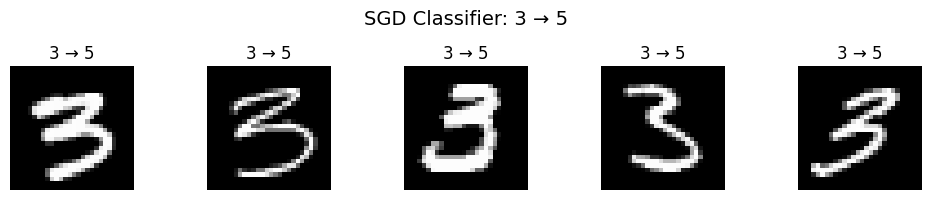

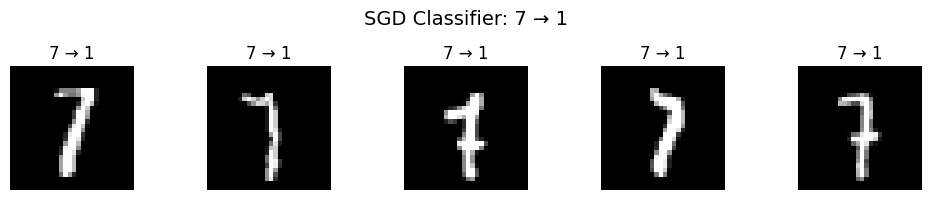

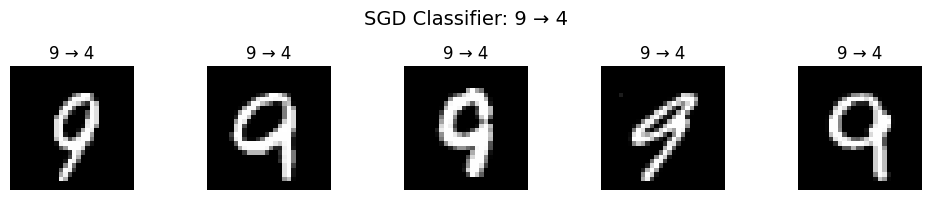

In [14]:
error_patterns = [
    (3, 5),
    (7, 1),
    (9, 4)
]

plot_misclassifications(Rand_forest, X_test, y_test, error_patterns, title="Random Forest")
plot_misclassifications(sgd, X_test, y_test, error_patterns, title="SGD Classifier")


### Implemantation of Immprovement

**Performed simple data augmentation and did rotation and shifting to improve model generalization.**


In [ ]:
from scipy.ndimage import rotate, shift
from sklearn.utils import shuffle

def augment_images(X, y, max_samples=5000):
    X_aug = []
    y_aug = []

    for i in range(len(X)):
        img = X[i].reshape(28, 28)

        rotated = rotate(img, angle=np.random.uniform(-10, 10), reshape=False)

        shifted = shift(img, shift=np.random.uniform(-2, 2, size=2), mode='constant')

        for aug in [rotated, shifted]:
            X_aug.append(aug.flatten())
            y_aug.append(y[i])

        if len(X_aug) >= max_samples:
            break

    return np.array(X_aug), np.array(y_aug)

X_aug, y_aug = augment_images(X_train, y_train, max_samples=10000)

X_train_combined = np.vstack((X_train, X_aug)) / 255.0
y_train_combined = np.concatenate((y_train, y_aug))


### Retraining of SGD on augmented data
This trained classifier is saved for deployment.


In [16]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_combined, y_train_combined)

joblib.dump(sgd, "sgd_model.pkl")

X_test_normalized = X_test / 255.0
y_pred_sgd = sgd.predict(X_test_normalized)

print("SGD Classification Report:\n", classification_report(y_test, y_pred_sgd))
print("SGD Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgd))


SGD Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       983
           1       0.87      0.98      0.93      1152
           2       0.89      0.90      0.90       967
           3       0.93      0.85      0.89      1034
           4       0.90      0.92      0.91       906
           5       0.83      0.89      0.86       937
           6       0.94      0.95      0.95       961
           7       0.95      0.92      0.94      1055
           8       0.93      0.75      0.83       969
           9       0.87      0.90      0.88      1036

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

SGD Confusion Matrix:
 [[ 955    1    3    0    0    3   13    2    5    1]
 [   0 1132    7    1    1    7    0    2    2    0]
 [  12   21  869    7   13    9   13    9   12    2]
 [   8   15   38  875    1   49

### Retraining of Random Forest on augmented data

This trained model is saved for deployment.

In [17]:
Rand_forest = RandomForestClassifier(random_state=42)
Rand_forest.fit(X_train_combined, y_train_combined)

joblib.dump(Rand_forest, "random_forest_model.pkl")

y_pred_rf = Rand_forest.predict(X_test_normalized)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       983
           1       0.98      0.98      0.98      1152
           2       0.95      0.98      0.96       967
           3       0.96      0.95      0.96      1034
           4       0.97      0.97      0.97       906
           5       0.97      0.96      0.97       937
           6       0.98      0.98      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.96      0.95      0.95       969
           9       0.96      0.95      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Random Forest Confusion Matrix:
 [[ 969    0    4    0    1    1    2    1    5    0]
 [   0 1134    6    5    1    0    0    3    3    0]
 [   2    1  944    0    4    1    4    5    6    0]
 [   1    0

## Chapter 3 Excercises Pages 105-107

In [18]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    for row in range(n_rows):
        row_images.append(np.concatenate(
            images[row * images_per_row:(row + 1) * images_per_row], axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap='binary', **options)
    plt.axis("off")

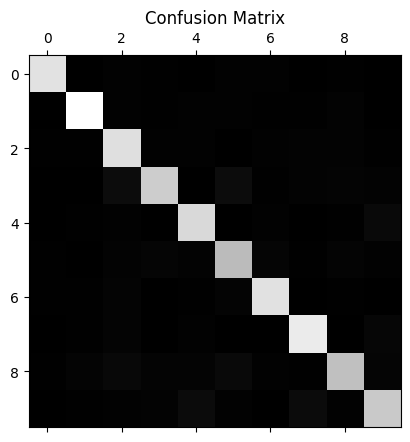

In [ ]:
y_train_pred = cross_val_predict(sgd, X_train_combined, y_train_combined, cv=3)

conf_mx = confusion_matrix(y_train_combined, y_train_pred)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.title("Confusion Matrix")
plt.show()


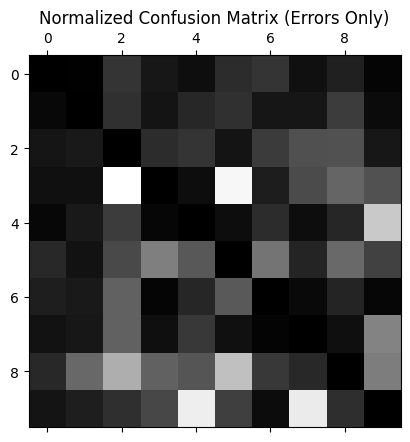

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.title("Normalized Confusion Matrix (Errors Only)")
plt.show()


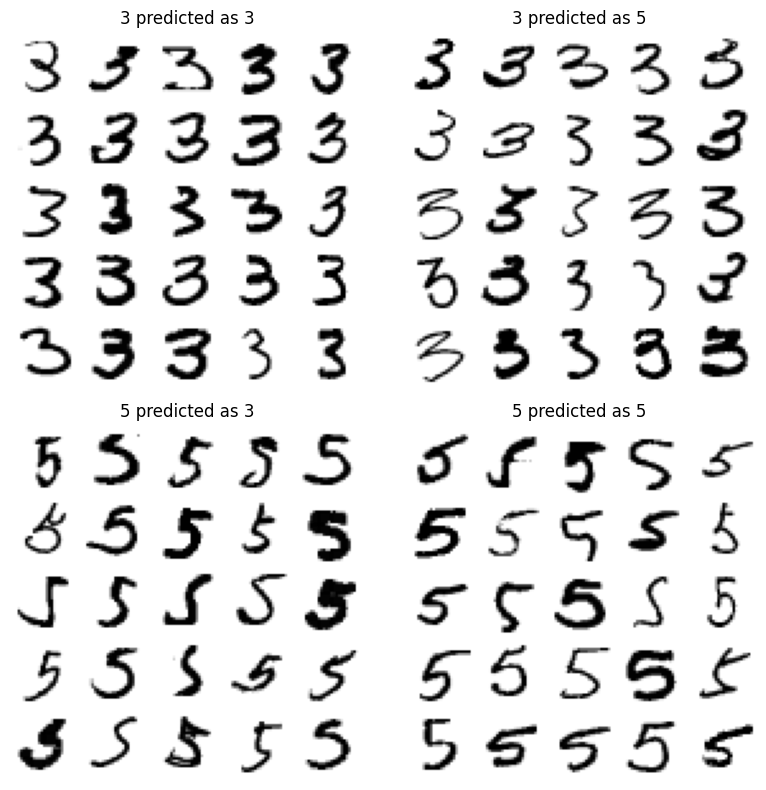

In [ ]:
y_train_combined = y_train_combined.astype(np.int32)
y_train_pred = y_train_pred.astype(np.int32)

cl_a, cl_b = 3, 5

X_aa = X_train_combined[(y_train_combined == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train_combined[(y_train_combined == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train_combined[(y_train_combined == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train_combined[(y_train_combined == cl_b) & (y_train_pred == cl_b)]

def safe_plot(title, data, pos):
    plt.subplot(pos)
    if len(data) > 0:
        plot_digits(data[:25], images_per_row=5)
    else:
        plt.text(0.5, 0.5, "No samples", ha="center", va="center")
    plt.title(title)

plt.figure(figsize=(8, 8))
safe_plot("3 predicted as 3", X_aa, 221)
safe_plot("3 predicted as 5", X_ab, 222)
safe_plot("5 predicted as 3", X_ba, 223)
safe_plot("5 predicted as 5", X_bb, 224)

plt.tight_layout()
plt.show()
